# How much money can you make in Data Science?

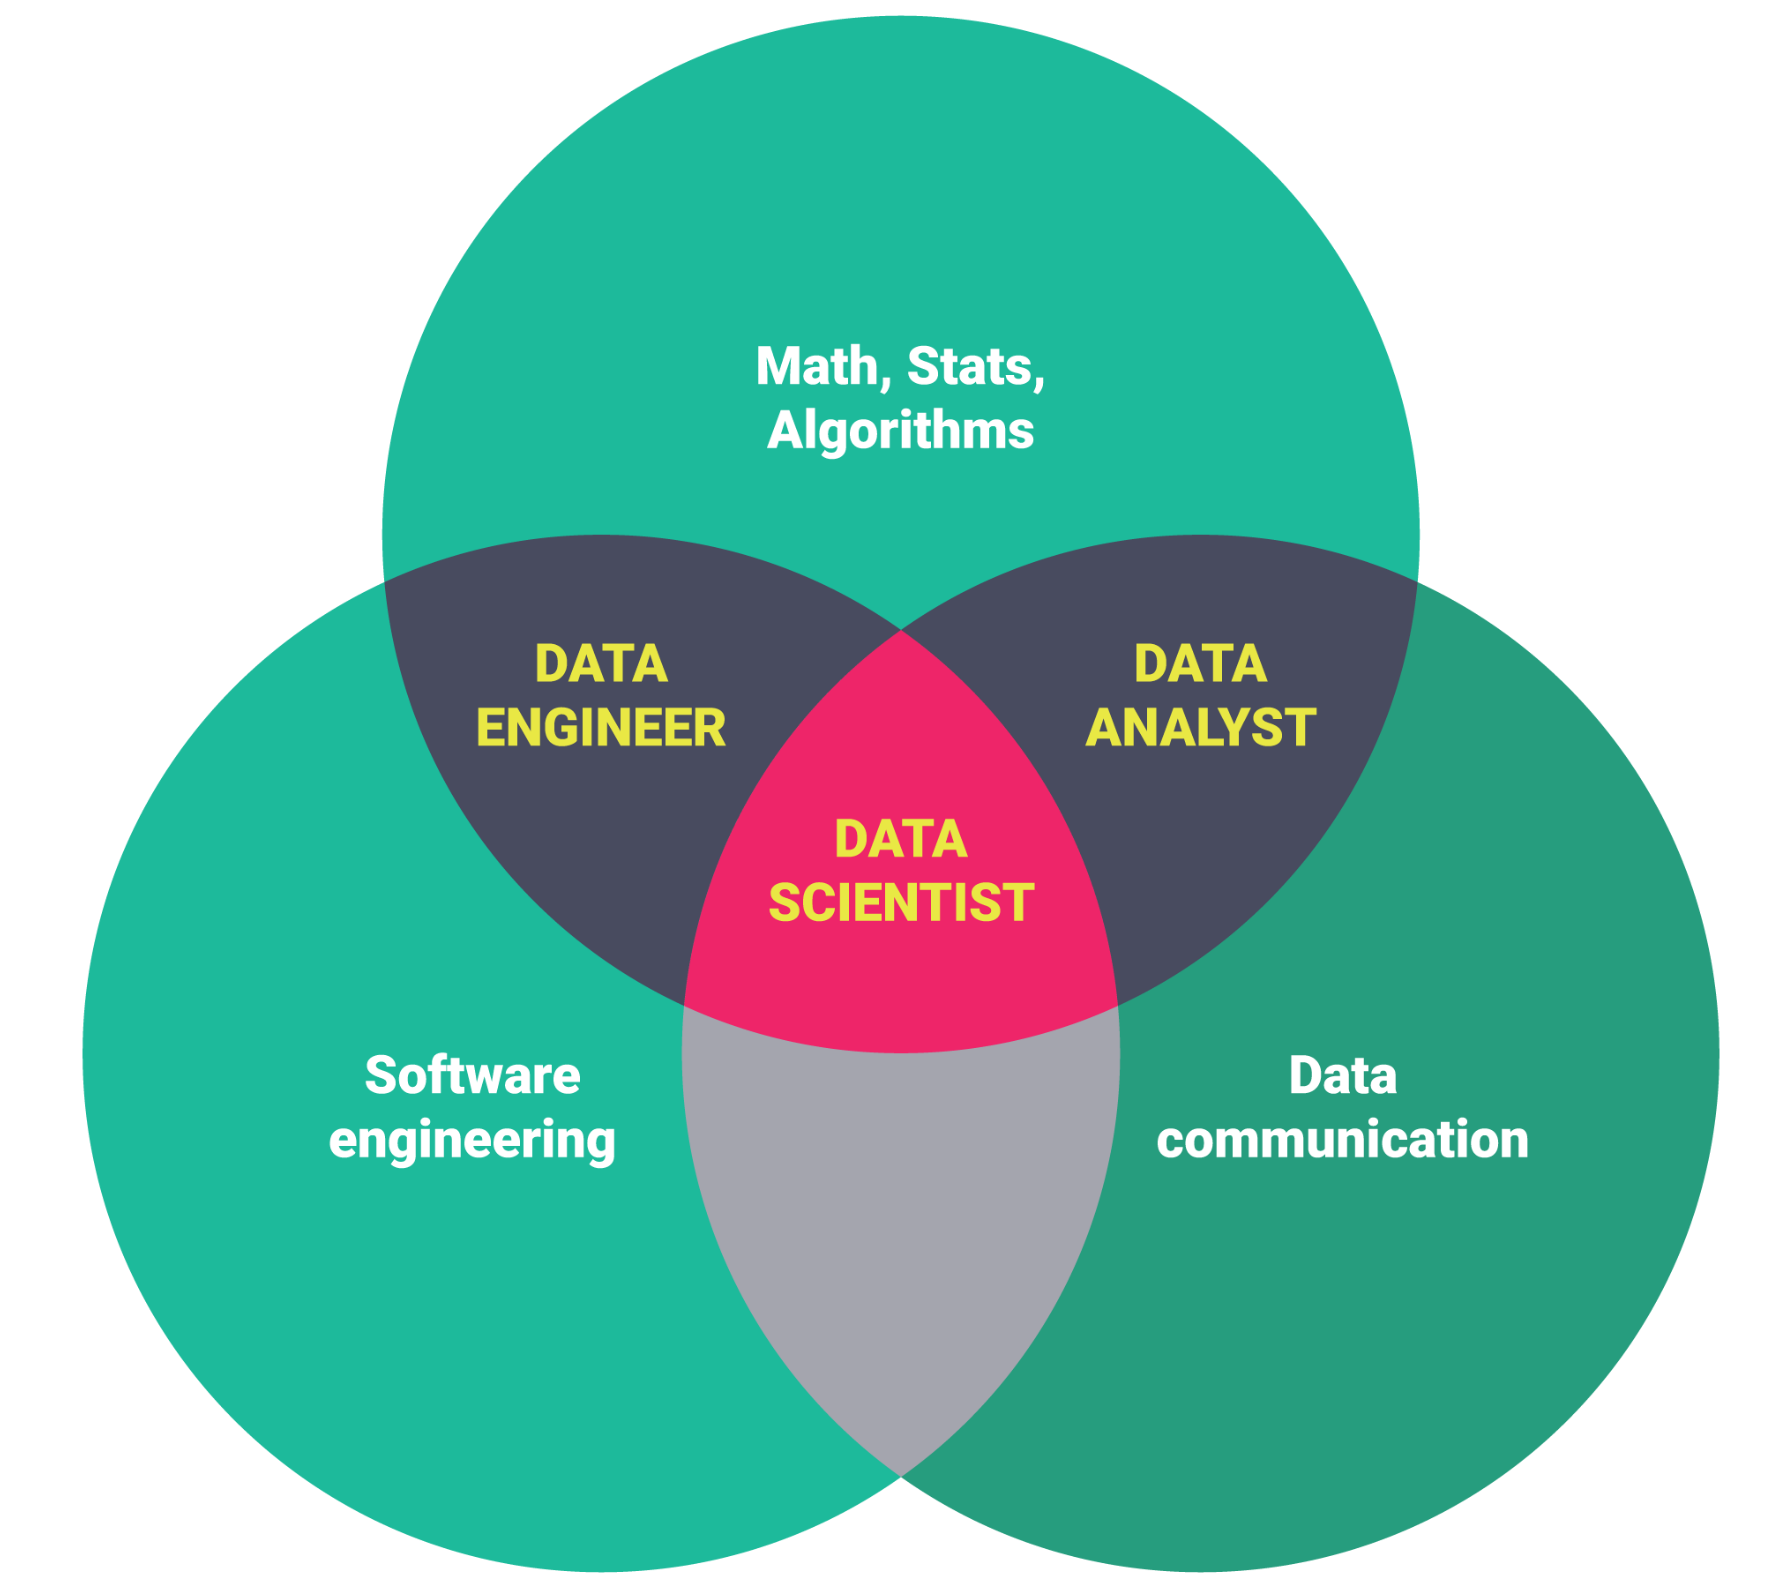
https://www.springboard.com/blog/data-science/data-science-career-paths-different-roles-industry/

work_year
The year during which the salary was paid. There are two types of work year values:
2020
Year with a definitive amount from the past
2021e
Year with an estimated amount (e.g. current year)

experience_level
The experience level in the job during the year with the following possible values:
EN
Entry-level / Junior
MI
Mid-level / Intermediate
SE
Senior-level / Expert
EX
Executive-level / Director

employment_type
The type of employement for the role:
PT
Part-time
FT
Full-time
CT
Contract
FL
Freelance

job_title
The role worked in during the year.
salary
The total gross salary amount paid.

salary_currency
The currency of the salary paid as an ISO 4217 currency code.

salaryinusd
The salary in USD (FX rate divided by avg. USD rate for the respective year via fxdata.foorilla.com).

employee_residence
Employee's primary country of residence in during the work year as an ISO 3166 country code.

remote_ratio
The overall amount of work done remotely, possible values are as follows:
0
No remote work (less than 20%)
50
Partially remote
100
Fully remote (more than 80%)

company_location
The country of the employer's main office or contracting branch as an ISO 3166 country code.

company_size
The average number of people that worked for the company during the year:
S
less than 50 employees (small)
M
50 to 250 employees (medium)
L
more than 250 employees (large)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import plotly.graph_objects as go
import plotly.offline as pyo
from plotly.offline import init_notebook_mode, iplot
from plotly.graph_objs import *

In [2]:
df = pd.read_csv('Data Science Jobs Salaries.csv')
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2021e,EN,FT,Data Science Consultant,54000,EUR,64369,DE,50,DE,L
1,2020,SE,FT,Data Scientist,60000,EUR,68428,GR,100,US,L
2,2021e,EX,FT,Head of Data Science,85000,USD,85000,RU,0,RU,M
3,2021e,EX,FT,Head of Data,230000,USD,230000,RU,50,RU,L
4,2021e,EN,FT,Machine Learning Engineer,125000,USD,125000,US,100,US,S


In [3]:
df.work_year.replace('2021e', '2021', inplace=True)
# df = df[df.work_year == '2021']

In [4]:
df.experience_level.replace({'EN': 'Entry-Level', 'MI': 'Mid-Level', 'SE': 'Senior-Level', 'EX': 'Executive'}, inplace=True)

In [5]:
df.employment_type.replace({'FT': 'Full-Time', 'PT': 'Part-Time', 'CT': 'Contract', 'FL': 'Freelance'}, inplace=True)

In [6]:
df.remote_ratio.replace({0: 'In-Office', 50: 'Hybrid', 100: 'Remote'}, inplace=True)

In [7]:
df.company_size.replace({'S': 'Small (<50)', 'M': 'Medium (50-250)', 'L': 'Large (>250)'}, inplace=True)

In [8]:
df.job_title.value_counts().to_csv('DS Job Titles.csv')

In [9]:
df_job_groups = pd.read_csv('DS Job Title Groups.csv')
df_job_groups.head()

,job_group,job_title,counts
0,Data Scientist,Data Scientist,59
1,Data Engineer,Data Engineer,38
2,Data Engineer,Machine Learning Engineer,20
3,Data Analyst,Data Analyst,20
4,Data Scientist,Research Scientist,10


In [10]:
df_job_groups.drop('counts', axis=1, inplace=True)
df = pd.merge(df, df_job_groups, how='left', on='job_title')
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,job_group
0,2021,Entry-Level,Full-Time,Data Science Consultant,54000,EUR,64369,DE,Hybrid,DE,Large (>250),Data Scientist
1,2020,Senior-Level,Full-Time,Data Scientist,60000,EUR,68428,GR,Remote,US,Large (>250),Data Scientist
2,2021,Executive,Full-Time,Head of Data Science,85000,USD,85000,RU,In-Office,RU,Medium (50-250),Data Scientist
3,2021,Executive,Full-Time,Head of Data,230000,USD,230000,RU,Hybrid,RU,Large (>250),Data Analyst
4,2021,Entry-Level,Full-Time,Machine Learning Engineer,125000,USD,125000,US,Remote,US,Small (<50),Data Engineer


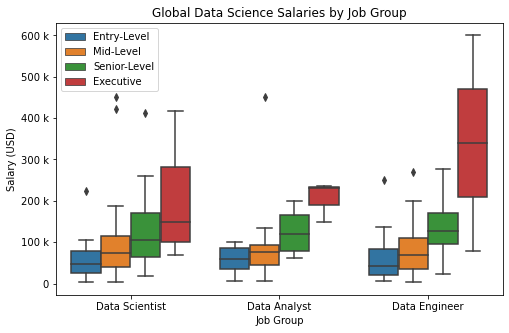

In [11]:
fig, ax = plt.subplots(figsize=(8, 5))    
g = sns.boxplot(x="job_group", y="salary_in_usd",
            hue="experience_level", # palette=["m", "g"],
            hue_order = ['Entry-Level', 'Mid-Level', 'Senior-Level', 'Executive'], 
            data=df,
            ax=ax)
ax.yaxis.set_major_formatter(ticker.EngFormatter())
g.legend_.set_title(None)
g.set_title('Global Data Science Salaries by Job Group')
g.set_xlabel('Job Group')
g.set_ylabel('Salary (USD)')
plt.show()

In [12]:
df_cc = pd.read_csv('country_codes.csv')
df_cc = df_cc[['alpha-2', 'name', 'region', 'sub-region']].copy()
df_cc.head()

,alpha-2,name,region,sub-region
0,AF,Afghanistan,Asia,Southern Asia
1,AX,Åland Islands,Europe,Northern Europe
2,AL,Albania,Europe,Southern Europe
3,DZ,Algeria,Africa,Northern Africa
4,AS,American Samoa,Oceania,Polynesia


In [13]:
df = pd.merge(df, df_cc, how='left', left_on='company_location', right_on='alpha-2')
df.drop('alpha-2', axis=1, inplace=True)
df.rename(columns={'name': 'cl_name', 'region': 'cl_region', 'sub-region': 'cl_subregion'}, inplace=True)
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,job_group,cl_name,cl_region,cl_subregion
0,2021,Entry-Level,Full-Time,Data Science Consultant,54000,EUR,64369,DE,Hybrid,DE,Large (>250),Data Scientist,Germany,Europe,Western Europe
1,2020,Senior-Level,Full-Time,Data Scientist,60000,EUR,68428,GR,Remote,US,Large (>250),Data Scientist,United States of America,Americas,Northern America
2,2021,Executive,Full-Time,Head of Data Science,85000,USD,85000,RU,In-Office,RU,Medium (50-250),Data Scientist,Russian Federation,Europe,Eastern Europe
3,2021,Executive,Full-Time,Head of Data,230000,USD,230000,RU,Hybrid,RU,Large (>250),Data Analyst,Russian Federation,Europe,Eastern Europe
4,2021,Entry-Level,Full-Time,Machine Learning Engineer,125000,USD,125000,US,Remote,US,Small (<50),Data Engineer,United States of America,Americas,Northern America


In [14]:
df_jr = pd.pivot_table(df, index='cl_region', columns='job_group', values=['salary_in_usd'])
df_jr.fillna(0, inplace=True)

regions = df_jr.index.values
data_analyst = df_jr[('salary_in_usd', 'Data Analyst')].values
data_engineer = df_jr[('salary_in_usd',  'Data Engineer')].values
data_scientist = df_jr['salary_in_usd', 'Data Scientist'].values
regions = [*regions, regions[0]]
data_analyst = [*data_analyst, data_analyst[0]]
data_engineer = [*data_engineer, data_engineer[0]]
data_scientist = [*data_scientist, data_scientist[0]]

init_notebook_mode(connected=True)

fig = go.Figure(
    data=[
        go.Scatterpolar(r=data_analyst, theta=regions, name='Data Analyst'),
        go.Scatterpolar(r=data_engineer, theta=regions, name='Data Engineer'),
        go.Scatterpolar(r=data_scientist, theta=regions, name='Data Scientist')
    ],
    layout=go.Layout(
        title=go.layout.Title(text='Data Science Salaries by Region'),
        polar={'radialaxis': {'visible': True}},
        showlegend=True
    )
)

pyo.iplot(fig)

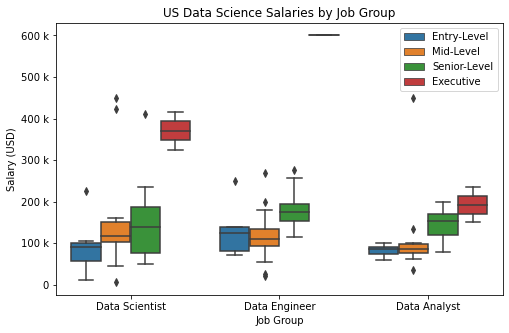

In [21]:
fig, ax = plt.subplots(figsize=(8, 5))    
g = sns.boxplot(x="job_group", y="salary_in_usd",
            hue="experience_level", # palette=["m", "g"],
            hue_order = ['Entry-Level', 'Mid-Level', 'Senior-Level', 'Executive'], 
            data=df[df.company_location == 'US'],
            ax=ax)
ax.yaxis.set_major_formatter(ticker.EngFormatter())
g.legend_.set_title(None)
g.set_title('US Data Science Salaries by Job Group')
g.set_xlabel('Job Group')
g.set_ylabel('Salary (USD)')
plt.show()